<a href="https://colab.research.google.com/github/Tommy3072/MineriaDeDatos/blob/main/Taller5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

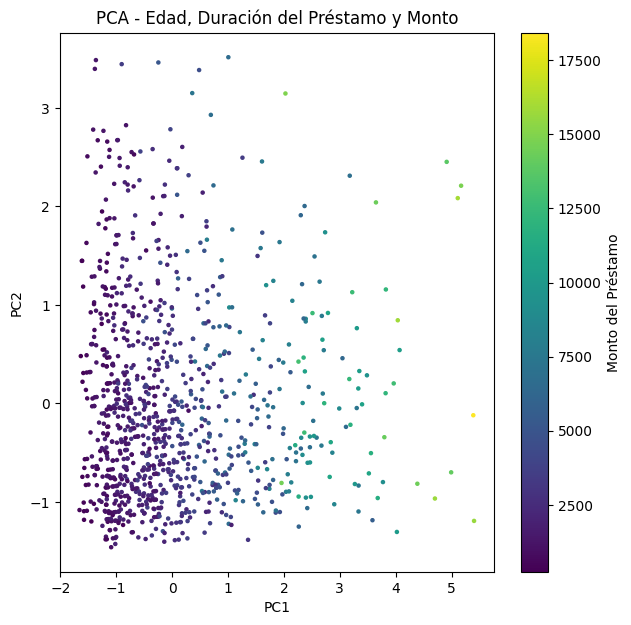

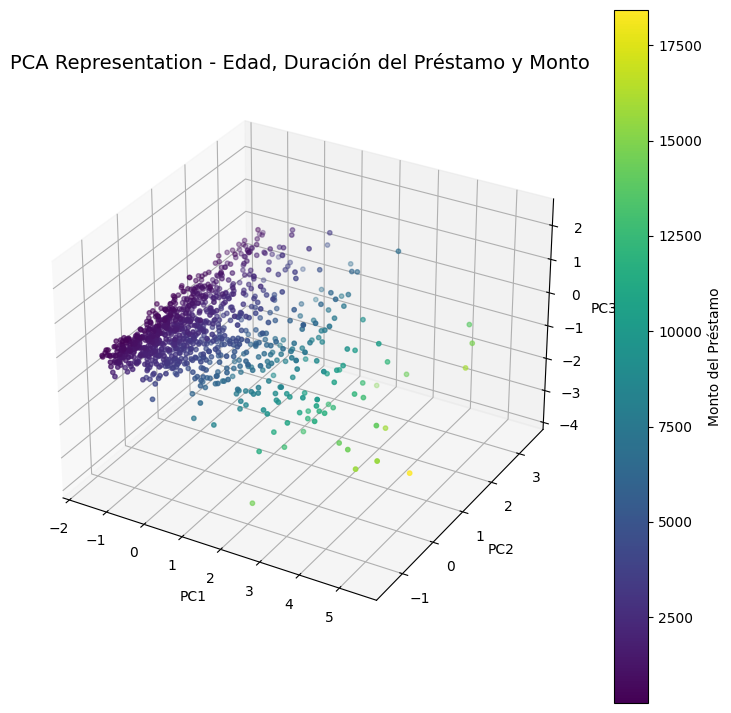

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings('ignore')

# Cargar el dataset
df = pd.read_csv(r"credito.csv")

# Seleccionar las columnas 'edad', 'duracion_prestamo' y 'monto'
df_selected = df[['edad', 'duracion_prestamo', 'monto']]

# Estandarizar los datos
scaler = StandardScaler()
df_std = scaler.fit_transform(df_selected)

# PCA con 2 componentes principales
pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(df_std)
principalDf2 = pd.DataFrame(data=principalComponents2, columns=['principal component 1', 'principal component 2'])

# Añadir las columnas originales para referencia
finalDf2 = pd.concat([principalDf2, df[['edad', 'duracion_prestamo', 'monto']]], axis=1)

# Visualizar los datos en un gráfico de dispersión 2D
plt.figure(figsize=(7,7))
plt.scatter(finalDf2['principal component 1'], finalDf2['principal component 2'], c=finalDf2['monto'], cmap='viridis', s=5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - Edad, Duración del Préstamo y Monto')
plt.colorbar(label='Monto del Préstamo')
plt.savefig("pca2_edad_duracion_monto.png")
plt.show()

# PCA con 3 componentes principales
pca3 = PCA(n_components=3)
principalComponents3 = pca3.fit_transform(df_std)
principalDf3 = pd.DataFrame(data=principalComponents3, columns=['principal component 1', 'principal component 2', 'principal component 3'])

# Añadir las columnas originales para referencia
finalDf3 = pd.concat([principalDf3, df[['edad', 'duracion_prestamo', 'monto']]], axis=1)

# Visualización en 3D
fig2 = plt.figure(figsize=(9,9))
axes = fig2.add_subplot(111, projection='3d')

axes.set_title('PCA Representation - Edad, Duración del Préstamo y Monto', size=14)
axes.set_xlabel('PC1')
axes.set_ylabel('PC2')
axes.set_zlabel('PC3')

# Graficar
scatter = axes.scatter(finalDf3['principal component 1'], finalDf3['principal component 2'], finalDf3['principal component 3'], c=finalDf3['monto'], cmap='viridis', s=10)
fig2.colorbar(scatter, ax=axes, label='Monto del Préstamo')

plt.savefig("pca3_edad_duracion_monto.png")
plt.show()



In [2]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
df = pd.read_csv(r"credito.csv")

# Seleccionar las columnas 'edad', 'duracion_prestamo' y 'monto'
df_selected = df[['edad', 'duracion_prestamo', 'monto']]

# Estandarizar los datos
scaler = StandardScaler()
df_std = scaler.fit_transform(df_selected)

# PCA con 3 componentes principales
pca3 = PCA(n_components=3)
principalComponents3 = pca3.fit_transform(df_std)
principalDf3 = pd.DataFrame(data=principalComponents3, columns=['PC1', 'PC2', 'PC3'])

# Añadir las columnas originales para referencia
finalDf3 = pd.concat([principalDf3, df[['monto']]], axis=1)

# Crear gráfico interactivo con Plotly
fig = px.scatter_3d(finalDf3, x='PC1', y='PC2', z='PC3',
                    color='monto', color_continuous_scale='Viridis',
                    title='PCA Representation - Edad, Duración del Préstamo y Monto')

# Mostrar gráfico interactivo
fig.show()
